In [1]:
import pandas as pd
import numpy as np
import re
import pickle

In [3]:
# open train text file
f = open(f'./covid_text.pckl','rb')
covid_data = pickle.load(f)
f.close()

In [ ]:
f = open(f'./hashtag.pckl','rb')
hashtag = pickle.load(f)
f.close()

In [4]:
## cleaning the tweets
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mention
    text = re.sub(r'#','',text) # remove the hashtag symbol
    text = re.sub(r'https?:\/\/\S+', '',text) #remove hyperlink
    text = re.sub(r'\n','',text) # remove \n 
    text = re.sub(r'\r','',text) # remove \r
    text = re.sub(r'[0-9]+','',text) #remove all the number
    text = re.sub(r'\W+', ' ', text) #remove special characters
    text = text.strip().lower()
    if len(text) != 0:
        return text
    else:
        return None
    
for i in range(len(covid_data)):
    for j in range(len(covid_data[i])):
        covid_data[i][j] = clean_text(covid_data[i][j])
    covid_data[i] = [x for x in covid_data[i] if x is not None]
        

In [5]:
# merge source tweeet and reply tweet together for test data    
covid_merge_events=[]
for event in covid_data:
    merge = ''
    for tweet in event:
        merge = merge + tweet
    covid_merge_events.append(merge)

In [6]:
covid_df = pd.DataFrame({'text':covid_merge_events})

nan_value = float("NaN")

covid_df.replace("", nan_value, inplace=True)

covid_df.dropna(axis=0 ,inplace=True)

covid_df.to_csv('covid.tsv', sep='\t',index=False)

In [7]:
covid_df.shape

(17012, 1)

In [8]:
df = pd.read_csv('covid_predict.csv')

In [9]:
df

,text,Predicted
0,according to the new york times warner bros wa...,0
1,hurricane hanna has made landfall in texas the...,0
2,monkeys on the loose in india with stolen coro...,0
3,let s not play blind that the work is fighting...,0
4,if trump felt comfortable having it here then ...,0
...,...,...
17007,i wonder how many lives could ve been saved if...,0
17008,the front page on th march the first line read...,0
17009,trump just completed the racism trifecta in a ...,1
17010,here are a few of my photographs from today s ...,0


In [10]:
df['text'][0]

'according to the new york times warner bros wanted to delay christopher nolan s tenet months ago due to the covid pandemic but nolan refused to listen to any discussions the studio kept the original release date to keep nolan happy'

In [11]:
df_nonrummor = df[df['Predicted'] == 0]

In [12]:
df_nonrummor.shape

(14914, 2)

In [13]:
df_rummor = df[df['Predicted'] == 1]

In [14]:
df_rummor.shape

(2098, 2)

In [15]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

     |████████████████████████████████| 175 kB 7.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=734a0adea8c506a7a8344fe8b16e564e82e93aa6a7e0042cb1191735fd2fea5e
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 245 kB 7.3 MB/s 
     |████████████████████████████████| 4.7 MB 40.2 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 
     |████████████████████████████████| 102 kB 82.0 MB/s 
     |████████████████████████████████| 690 kB 48.6 MB/s 
     |████████████████████████████████| 812 kB 47.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cc4183d687c9a15412d577ab9f27c5ce6fa306f27063b559ccd5d35eb8554403
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655

In [16]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [17]:
rummors = df_rummor['text'].to_numpy()
non_rummors = df_nonrummor['text'].to_numpy()

In [18]:
from gensim.parsing.preprocessing import remove_stopwords

import nltk
nltk.download('punkt')
non_rummor_tokens = []
for rummor in non_rummors:
  rummor = remove_stopwords(rummor)
  token = nltk.word_tokenize(rummor)
  non_rummor_tokens.append(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for tokens in non_rummor_tokens:
  for i in range(len(tokens)):
    tokens[i] = lemmatizer.lemmatize(tokens[i])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [20]:
non_rummor_token_final =[]
for tokens in non_rummor_tokens:
  temp=[]
  for token in tokens:
    if len(token) >=3 and token not in temp:
      temp.append(token)
  non_rummor_token_final.append(temp) 

In [21]:
# Create a id2word dictionary
id2word = Dictionary(non_rummor_token_final)
print(len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in non_rummor_token_final]

167618
41331


In [22]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)


In [23]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
covid coronavirus amp people death new case day state like

------ Topic 1 ------
covid coronavirus people amp case virus day like time trump

------ Topic 2 ------
covid coronavirus death trump amp time case people pandemic virus

------ Topic 3 ------
covid coronavirus people amp like pandemic need know case new

------ Topic 4 ------
coronavirus covid people trump death case new american state pandemic



In [24]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=non_rummor_token_final, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -8.785168315143688

Coherence Score:  0.7059873594504336


In [25]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [26]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.029176 -0.003426       1        1  29.525865
1      0.020365 -0.007613       2        1  21.435505
3      0.007529 -0.016621       3        1  18.525797
4     -0.014571  0.008489       4        1  17.052918
0      0.015853  0.019170       5        1  13.459914, topic_info=            Term          Freq         Total Category  logprob  loglift
4          covid  10383.000000  10383.000000  Default  30.0000  30.0000
26   coronavirus   9869.000000   9869.000000  Default  29.0000  29.0000
172       people   5270.000000   5270.000000  Default  28.0000  28.0000
72           amp   4388.000000   4388.000000  Default  27.0000  27.0000
12           new   3251.000000   3251.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
499         need    388.091679   3106.529143   Topic5  -6.0649  -0.0746
211      testing    312.736204   2017.424868   Topic5  -6.2808   0.1412
145         know    358.712418   2909.792253   Topic5  -6.1436  -0.0879
118        going    332.675183   2482.817700   Topic5  -6.2190  -0.0045
588       health    328.008188   2576.299219   Topic5  -6.2331  -0.0556

[515 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
16272      5  0.707942    _beast
16273      2  0.169418  _bharati
16273      5  0.847088  _bharati
30872      5  0.850844  _bhayani
16276      5  0.705010      _eve
...      ...       ...       ...
12543      1  0.044617       zoo
12543      2  0.133851       zoo
12543      3  0.624638       zoo
12543      4  0.044617       zoo
12543      5  0.133851       zoo

[1315 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

In [27]:
text = [' '.join(map(str, l)) for l in non_rummor_token_final]

In [28]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(text)

In [29]:
# Define Search Param
search_params = {'n_components': [10, 20, 30], 'learning_decay': [.5]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             n_jobs=1,
             param_grid={'n_topics': [10, 20, 30], 
                         'learning_decay': [0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -3231818.0514921932
Model Perplexity:  13755.10813282813


In [30]:
model_final = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=10,
                       decay=0.5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [31]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_final.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
coronavirus covid pandemic people amp like life trump time day

------ Topic 1 ------
coronavirus covid amp people trump like know american virus need

------ Topic 2 ------
covid coronavirus amp time trump people test health testing case

------ Topic 3 ------
coronavirus covid people trump need amp like world country virus

------ Topic 4 ------
covid coronavirus death country case people american trump news president

------ Topic 5 ------
covid coronavirus people amp virus like country case know time

------ Topic 6 ------
covid coronavirus death case country china amp new people virus

------ Topic 7 ------
covid coronavirus amp people year like spread week time case

------ Topic 8 ------
covid coronavirus people amp need test death pandemic positive case

------ Topic 9 ------
coronavirus covid new people case death amp trump like virus



In [32]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model_final, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.000406  0.014064       1        1  19.883506
1     -0.048373 -0.004340       2        1  17.423366
8      0.027918  0.015317       3        1  12.303366
0     -0.016558  0.004447       4        1  12.055098
4     -0.037721 -0.002678       5        1  10.164331
5      0.013638  0.017074       6        1   9.733849
3     -0.011295  0.002442       7        1   8.767665
7     -0.009879 -0.009552       8        1   4.445965
6      0.046229  0.032104       9        1   3.899584
2      0.035634 -0.068879      10        1   1.323269, topic_info=            Term          Freq         Total Category  logprob  loglift
4          covid  10306.000000  10306.000000  Default  30.0000  30.0000
26   coronavirus   9828.000000   9828.000000  Default  29.0000  29.0000
72           amp   4491.000000   4491.000000  Default  28.0000  28.0000
85          case   3813.000000   3813.000000  Default  27.0000  27.0000
27         death   3763.000000   3763.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
702         data     24.594197    928.506209  Topic10  -6.5040   0.6940
612     positive     28.728773   1891.636037  Topic10  -6.3487   0.1378
27         death     32.548897   3763.945124  Topic10  -6.2238  -0.4254
129         home     29.064071   2142.527604  Topic10  -6.3370   0.0248
39           way     28.648468   1993.546264  Topic10  -6.3515   0.0825

[921 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
32125      5  0.825929     _hospital
27542      7  0.872111           _ke
15594      5  0.855137        _party
12995      5  0.860754  _pence_pence
12995      8  0.057384  _pence_pence
...      ...       ...           ...
4270       7  0.112602          zuma
4270      10  0.675610          zuma
14582      5  0.855609           तरह
4126       3  0.861569           सरक
22791      6  0.977620           โคว

[2817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 9, 1, 5, 6, 4, 8, 7, 3])

SENTIMENT

In [33]:
    !pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.3 MB/s 


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [35]:
tweetsWithSent = []
for tweet in rummors:
  ps = analyzer.polarity_scores(tweet)
  tweetsWithSent.append({'text':tweet, 'compound':ps['compound']})

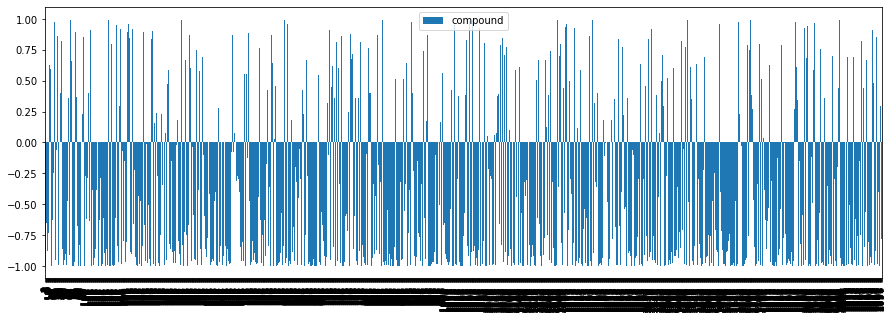

In [36]:
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)

DONE